In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import kagglehub
import os
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
base_path = kagglehub.dataset_download('mattiuzc/stock-exchange-data')

# Find the CSV file in the directory
csv_files = []
for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(os.path.join(root, file))

if csv_files:
    # Use the first CSV file found
    data = pd.read_csv(csv_files[0], delimiter=',', nrows=None)
    print("Data loaded successfully:")
    print(data)
else:
    print(f"No CSV files found in {base_path}")
    print("Available files:", os.listdir(base_path))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Data loaded successfully:
       Index        Date         Open         High          Low        Close  \
0        NYA  1965-12-31   528.690002   528.690002   528.690002   528.690002   
1        NYA  1966-01-03   527.210022   527.210022   527.210022   527.210022   
2        NYA  1966-01-04   527.840027   527.840027   527.840027   527.840027   
3        NYA  1966-01-05   531.119995   531.119995   531.119995   531.119995   
4        NYA  1966-01-06   532.070007   532.070007   532.070007   532.070007   
...      ...         ...          ...          ...          ...          ...   
112452  N100  2021-05-27  1241.119995  1251.910034  1241.119995  1247.069946   
112453  N100  2021-05-28  1249.469971  1259.209961  1249.030029  1256.599976   
112454  N100  2021-05-31  1256.079956  1258.880005  1248.140015  1248.930054   
112455  N100  2021-06-01  1254.609985  1265.660034  1254.609985  1258.579956   
112456  N100  2021-06-02  1258.489990  1263.709961  1258.239990  1263.619995   

          Adj

In [2]:
# Check for null values
print("\nNull values in each column:")
print(data.isnull().sum())

# Get basic information about the dataset
print("\nDataset Info:")
data.info()

# Display basic statistics
print("\nBasic Statistics:")
print(data.describe())

# Check for duplicate rows
print("\nNumber of duplicate rows:", data.duplicated().sum())

# Display data types of columns
print("\nData types of columns:")
print(data.dtypes)

# Display rows with null values
print("\nSample of rows with null values:")
print(data[data.isnull().any(axis=1)].head())



Null values in each column:
Index           0
Date            0
Open         2204
High         2204
Low          2204
Close        2204
Adj Close    2204
Volume       2204
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      112457 non-null  object 
 1   Date       112457 non-null  object 
 2   Open       110253 non-null  float64
 3   High       110253 non-null  float64
 4   Low        110253 non-null  float64
 5   Close      110253 non-null  float64
 6   Adj Close  110253 non-null  float64
 7   Volume     110253 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.9+ MB

Basic Statistics:
                Open           High            Low          Close  \
count  110253.000000  110253.000000  110253.000000  110253.000000   
mean     7658.515222    7704.372961    7608.000422    7657.545872   
s

In [3]:
# Find rows where any column is null but at least one of the price/volume columns is not null
price_volume_cols = ['High', 'Low', 'Open', 'Close', 'Adj Close', 'Volume']
rows_with_partial_data = data[
    (data.isnull().any(axis=1)) & # Has some null values
    (data[price_volume_cols].notnull().any(axis=1)) # But has at least one price/volume column not null
]

print("\nRows with partial price/volume data:")
print(rows_with_partial_data)
print("\nCount of such rows:", len(rows_with_partial_data))




Rows with partial price/volume data:
Empty DataFrame
Columns: [Index, Date, Open, High, Low, Close, Adj Close, Volume]
Index: []

Count of such rows: 0


This means that any row with a null value has no useful information, therefore we can drop them.


In [4]:
# Drop rows with null values
data = data.dropna()
print("\nShape after dropping null values:", data.shape)



Shape after dropping null values: (110253, 8)


Now, we can drop the rows with 0 volume, as they are not useful for our analysis. If providing a more in depth analysis, this would be handled differently.

In [5]:
# Drop rows with 0 volume
data = data[data['Volume'] != 0]
print("\nShape after dropping rows with 0 volume:", data.shape)



Shape after dropping rows with 0 volume: (68160, 8)


When did electronic trading become dominant? (This dramatically changed market behavior)
Late 1990s - 2000s

When did algorithmic trading start becoming a significant force?
mid 1990s

When did the current market structure (like Regulation NMS) come into place?
2005

When did high-frequency trading begin to materially impact market dynamics?
2010 was the major crisis -  assume it was a few years before this 2005 ?

What major financial crisis fundamentally changed how markets operate and are regulated?
2008 recession - deregulation in the financial industry that permitted banks to engage in hedge fund trading with derivatives


In [6]:
#now look at our date ranges
data['Date'] = pd.to_datetime(data['Date'])
print(data['Date'].min(), data['Date'].max())

#ok so lets drop the dates before 2005, and see how many rows we have left
post_2005 = data[data['Date'] >= '2005-01-01']
print(post_2005.shape)


1984-10-11 00:00:00 2021-06-02 00:00:00
(50517, 8)


Date
2005-01-31    1.439235e+09
2005-02-28    1.700896e+09
2005-03-31    1.597882e+09
2005-04-30    1.452804e+09
2005-05-31    1.431994e+09
                  ...     
2021-02-28    3.625592e+09
2021-03-31    3.331762e+09
2021-04-30    2.445761e+09
2021-05-31    2.780926e+09
2021-06-30    6.092912e+07
Freq: ME, Name: Volume, Length: 198, dtype: float64


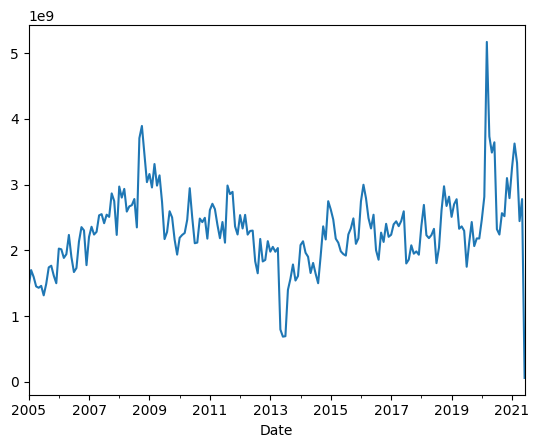

In [7]:
#use resample() to get the average volume for each month
monthly_volume = post_2005.resample('ME', on='Date')['Volume'].mean() #view all the months
print(monthly_volume)

#plot the monthly volume
monthly_volume.plot()
plt.show()



In [8]:
#check for data accuracy

#extreme outliers
#-> get average over span of a month, then check that the number is not way greater than or less than the average
# Modify find_outliers() to handle non-numeric data
def find_outliers(data):

    # Define threshold for outliers (e.g. 3 standard deviations)
    threshold = 3

    # For each numeric column, find outliers
    numeric_cols = ['Open', 'High', 'Low', 'Close']
    for col in numeric_cols:
        # Get monthly stats for the current date
        monthly_group = data.groupby(data['Date'].dt.to_period('M'))
        curr_means = monthly_group[col].transform('mean')
        curr_stds = monthly_group[col].transform('std')
        
        # Calculate z-scores
        z_scores = abs((data[col] - curr_means) / curr_stds)
        
        # Find outliers
        outliers = data[z_scores > threshold]
        if len(outliers) > 0:
            print(f"\nOutliers found in {col}:")
            # Get indices of outlier rows
            outlier_indices = outliers.index

            print('outlier dates:', outliers['Date'])
            
            # For each outlier, print the outlier row and surrounding dates
            for idx in outlier_indices:
                # Get the actual outlier row index in data
                outlier_row = data.index.get_loc(idx)
                # Get 2 rows before and after if they exist
                start_idx = max(0, outlier_row - 2)
                end_idx = min(len(data), outlier_row + 3)
                surrounding_rows = data.iloc[start_idx:end_idx]
                print(f"\nOutlier and surrounding dates:")
                print(surrounding_rows[['Date', col]])

            

    #print the columns of outliers, as well as their neighboring dates
    

    # For Volume, use a rolling window approach instead of monthly
    # This gives more local context
    window_size = 20  # approximately one trading month

    # Calculate rolling statistics
    rolling_mean = data['Volume'].rolling(window=window_size).mean()
    rolling_std = data['Volume'].rolling(window=window_size).std()

    # Define multiple severity levels
    severe_outliers = data[
        (data['Volume'] > rolling_mean + 5 * rolling_std) |
        (data['Volume'] < rolling_mean - 5 * rolling_std)
    ]
    
    moderate_outliers = data[
        ((data['Volume'] > rolling_mean + 3 * rolling_std) &
         (data['Volume'] <= rolling_mean + 5 * rolling_std)) |
        ((data['Volume'] < rolling_mean - 3 * rolling_std) &
         (data['Volume'] >= rolling_mean - 5 * rolling_std))
    ]
    print('\nVolume Outliers:')
    print(f"Severe outliers found: {len(severe_outliers)}")
    print(f"Moderate outliers found: {len(moderate_outliers)}")
    
    # Show some examples of severe outliers
    if len(severe_outliers) > 0:
        print("\nSample of severe volume outliers:")
        print(severe_outliers[['Date', 'Volume']].head())
    



#any negative values?
def find_negatives(data):
    print('\nNegatives:')
    numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
    for col in numeric_cols:
        neg_values = data[data[col] < 0]
        if len(neg_values) > 0:
            print(f"\nNegative values found in {col}:")
            print(neg_values[['Date', col]])
        else:
            print(f"\nNo negative values found in {col}")


#duplicate entries?
def find_duplicates(data):
    print('\nDuplicates:')
    duplicates = data[data.duplicated()]
    if len(duplicates) > 0:
        print(f"Found {len(duplicates)} duplicate rows:")
        print(duplicates)
    else:
        print("No duplicate rows found")

#how many large gaps (> 5 days to account for long weekends and holidays)
def find_gaps(data):
    print('\nLarge gaps:')
    # Convert Date to datetime if not already
    data.loc[:,'Date'] = pd.to_datetime(data['Date'])

    # Calculate the difference between consecutive dates
    date_gaps = data['Date'].diff()

    # Find gaps larger than 5 days
    large_gaps = data[date_gaps > pd.Timedelta(days=5)]

    if len(large_gaps) > 0:
        print(f"Found {len(large_gaps)} gaps larger than 5 days:")
        # Get the previous dates by shifting the Date column
        previous_dates = data['Date'].shift()
        # Only get previous dates for rows with large gaps
        previous_dates = previous_dates[large_gaps.index]
        # Group gaps by number of days
        gap_days = (date_gaps[date_gaps > pd.Timedelta(days=5)]).dt.days
        gap_counts = gap_days.value_counts().sort_index()
        
        print("\nGap classification:")
        for days, count in gap_counts.items():
            print(f"{count} gap(s) of {days} days")

        # For gaps over 8 days, show details sorted by stock
        long_gaps = date_gaps[date_gaps > pd.Timedelta(days=8)]
        if len(long_gaps) > 0:
            print("\nGaps over 8 days by stock:")
            # Create gap_details DataFrame with Index and Gap Days
            gap_details = pd.DataFrame({
                'Index': data.loc[long_gaps.index, 'Index'],  # Get Index values for the gaps
                'Gap Days': long_gaps.dt.days
            })
            
            # Group by Index and Gap Days to count occurrences
            gap_summary = gap_details.groupby(['Index', 'Gap Days']).size().reset_index(name='Count')
            gap_summary = gap_summary.sort_values(['Index', 'Gap Days'])
            
            # Print summary for each stock index
            current_index = None
            for _, row in gap_summary.iterrows():
                if current_index != row['Index']:
                    print(f"\n{row['Index']}:")
                    current_index = row['Index']
                print(f"{row['Count']} gap(s) of {int(row['Gap Days'])} days")

        # Create a set to store indices that meet either criteria
        indices_to_drop = set()
        
        # Find gaps over 20 days
        very_long_gaps = date_gaps[date_gaps > pd.Timedelta(days=20)]
        indices_to_drop.update(data.loc[very_long_gaps.index, 'Index'].unique())
        
        # Find indices with more than 10 gaps of 8+ days
        long_gaps = date_gaps[date_gaps > pd.Timedelta(days=8)]
        gap_counts_by_index = data.loc[long_gaps.index, 'Index'].value_counts()
        indices_with_many_gaps = gap_counts_by_index[gap_counts_by_index > 10].index
        indices_to_drop.update(indices_with_many_gaps)
        
        return list(indices_to_drop)
    else:
        print("No gaps larger than 5 days found")


#all logical relationships? (High > Low)
def check_relationships(data):
    print('\nHigh < Low check:')
    invalid_hl = data[data['High'] < data['Low']]

    if len(invalid_hl) > 0:
        print(f"Found {len(invalid_hl)} rows where High < Low:")
        print(invalid_hl)
    else:
        print("No invalid High/Low relationships found")

find_outliers(post_2005)
find_negatives(post_2005)
find_duplicates(post_2005)
big_gap_tickers = find_gaps(post_2005)
check_relationships(post_2005)




Outliers found in Open:
outlier dates: 32261   2008-10-02
32262   2008-10-03
Name: Date, dtype: datetime64[ns]

Outlier and surrounding dates:
            Date         Open
32259 2008-09-29  18742.25000
32260 2008-09-30  16898.33008
32261 2008-10-02  17870.42969
32262 2008-10-03  17788.99023
32263 2008-10-06  17156.21094

Outlier and surrounding dates:
            Date         Open
32260 2008-09-30  16898.33008
32261 2008-10-02  17870.42969
32262 2008-10-03  17788.99023
32263 2008-10-06  17156.21094
32264 2008-10-08  16107.98047

Outliers found in High:
outlier dates: 32261   2008-10-02
Name: Date, dtype: datetime64[ns]

Outlier and surrounding dates:
            Date         High
32259 2008-09-29  18742.25000
32260 2008-09-30  18029.76953
32261 2008-10-02  18285.67969
32262 2008-10-03  17926.14063
32263 2008-10-06  17241.77930

Outliers found in Low:
outlier dates: 32261   2008-10-02
32262   2008-10-03
Name: Date, dtype: datetime64[ns]

Outlier and surrounding dates:
            Date

Looks like we only need to drop the indexs with lots of gaps, lets say anything with gaps of over 20, or more than 10 gaps of over 8 days

In [9]:
# Filter out stocks with problematic gaps using big_gap_tickers list
post_2005 = post_2005[~post_2005['Index'].isin(big_gap_tickers)]

#check gaps again
should_be_empty = find_gaps(post_2005)
print('should be empty:', should_be_empty)

#see what year the data ends
# Get the latest date in the dataset
latest_date = post_2005['Date'].max()
print(f"Data ends at: {latest_date}")

# Get the earliest date in the dataset
earliest_date = post_2005['Date'].min() 
print(f"Data starts at: {earliest_date}")



Large gaps:
Found 63 gaps larger than 5 days:

Gap classification:
55 gap(s) of 6 days
5 gap(s) of 7 days
3 gap(s) of 11 days

Gaps over 8 days by stock:

KS11:
1 gap(s) of 11 days

N225:
2 gap(s) of 11 days
should be empty: []
Data ends at: 2021-06-02 00:00:00
Data starts at: 2005-01-03 00:00:00


Since we still have gaps of 1-11 days, we cannot do anything with daily or weekly trends. This is fine as with stock prices, as long term means much more than short term. We will work now with monthly, quarterly, and yearly trends

In [10]:
#timeframe compression stock?
#Split into dict and label by Month and Year

import time

# Create nested dictionary structure

# Get min and max years from data
min_year = int(post_2005['Date'].min().year)
max_year = int(post_2005['Date'].max().year)
print(max_year)

MONTH_KEY = {
    '01': 'January',
    '02': 'February', 
    '03': 'March',
    '04': 'April',
    '05': 'May',
    '06': 'June',
    '07': 'July',
    '08': 'August',
    '09': 'September',
    '10': 'October',
    '11': 'November',
    '12': 'December'
}
DataByTime = {}

# Initialize DataByTime structure
for year in range(min_year, max_year + 1):
    DataByTime[year] = {}
    for month in MONTH_KEY.values():
        DataByTime[year][month] = {}

for index, row in post_2005.iterrows():
    date_str = row['Date'].strftime('%Y-%m-%d')  # Assuming Date is already datetime
    year = int(date_str.split('-')[0])
    month = date_str.split('-')[1]  # Keep as string to match MONTH_KEY
    day = int(date_str.split('-')[2])

    if (day == 1):
        DataByTime[year][MONTH_KEY[month]][row['Index']] = {}

    if row['Index'] not in DataByTime[year][MONTH_KEY[month]]:
        DataByTime[year][MONTH_KEY[month]][row['Index']] = {}
    
    DataByTime[year][MONTH_KEY[month]][row['Index']][day] = row

# Print first few entries
# Note: .head() won't work on a dictionary, so we'll print a sample
print("Sample of data structure:")
first_year = list(DataByTime.keys())[0]
first_month = list(DataByTime[first_year].keys())[0]
print(f"Data for {first_month} {first_year}:")
print(list(DataByTime[first_year][first_month].keys())[:5])
print(DataByTime[2005]['December']['NYA'][15])

# Calculate average days per month
total_days = 0
total_months = 0
total_days_filled = 0


market_stats = {}

for year in DataByTime:
    # Initialize market-wide stats for each year
    if year not in market_stats:
        market_stats[year] = {}
    
    # Calculate market-wide quarterly features
    for month in DataByTime[year]:

        total_days_filled += len(DataByTime[year][month])
        # Get first index (e.g. 'NYA') to check days
        if DataByTime[year][month]:  # Check if month has any data
            first_index = list(DataByTime[year][month].keys())[0]
            days_in_month = len(DataByTime[year][month][first_index])
            if days_in_month > 0:  # Only count months with data
                total_days += days_in_month
                total_months += 1

        market_stats[year][month] = {
            'avg_volume': 0,
            'avg_volatility': 0, 
            'breadth': 0,
            'weighted_trend': 0
        }
        
        month_list = list(DataByTime[year].keys())
        month_idx = month_list.index(month)
        
        # Get previous 2 months if available
        lookback_months = []
        if month_idx >= 2:
            lookback_months = month_list[month_idx-2:month_idx+1]
        elif month_idx == 1:
            if year-1 in DataByTime:
                lookback_months = ['December'] + month_list[:2]
        elif month_idx == 0:
            if year-1 in DataByTime:
                lookback_months = ['November', 'December'] + month_list[:1]
                
        if lookback_months:
            # Calculate weighted stats over lookback period
            weights = [0.2, 0.3, 0.5] # More weight on recent month
            for i, m in enumerate(lookback_months):
                curr_year = year
                if m in ['November', 'December'] and month_idx < 2:
                    curr_year = year - 1
                    
                month_indices = DataByTime[curr_year][m]
                if month_indices:
                    # Volume
                    volumes = []
                    volatilities = []
                    returns = []
                    
                    for idx in month_indices:
                        if 'stats' in month_indices[idx]:
                            stats = month_indices[idx]['stats']
                            if 'avg_volume' in stats:
                                volumes.append(stats['avg_volume'])
                            if 'volatility' in stats:
                                volatilities.append(stats['volatility'])
                            if 'returns_sum' in stats:
                                returns.append(stats['returns_sum'])
                    
                    if volumes:
                        market_stats[year][month]['avg_volume'] += weights[i] * np.mean(volumes)
                    if volatilities:
                        market_stats[year][month]['avg_volatility'] += weights[i] * np.mean(volatilities)
                    if returns:
                        market_stats[year][month]['breadth'] += weights[i] * (len([r for r in returns if r > 0])/len(returns))
                        market_stats[year][month]['weighted_trend'] += weights[i] * np.mean(returns)

        for index in DataByTime[year][month]:
            DataByTime[year][month][index]['stats'] = {}
            # Add market stats as index stats with 'm_' prefix
            for stat_name, stat_value in market_stats[year][month].items():
                DataByTime[year][month][index]['stats'][f'm_{stat_name}'] = stat_value
            #try: because it may or may not exist, we know this month exists tho
            # Calculate quarterly trend (last 3 months)
            quarterly_trend = 0
            try:
                # Get previous 2 months' data
                prev_months = []
                current_month_list = list(DataByTime[year].keys())
                current_month_idx = current_month_list.index(month)
                
                if current_month_idx >= 2:
                    # Same year, previous 2 months
                    prev_months = [
                        DataByTime[year][current_month_list[current_month_idx-2]][index]['stats']['last_close'],
                        DataByTime[year][current_month_list[current_month_idx-1]][index]['stats']['last_close']
                    ]
                elif current_month_idx == 1:
                    # Need 1 month from previous year
                    prev_months = [
                        DataByTime[year-1]['December'][index]['stats']['last_close'],
                        DataByTime[year][current_month_list[0]][index]['stats']['last_close']
                    ]
                elif current_month_idx == 0:
                    # Need 2 months from previous year
                    prev_months = [
                        DataByTime[year-1]['November'][index]['stats']['last_close'],
                        DataByTime[year-1]['December'][index]['stats']['last_close']
                    ]
                
                if prev_months:
                    # Calculate trend over last quarter
                    closes = prev_months + [last_close]
                    quarterly_trend = (closes[2] - closes[0])/closes[0]
                    DataByTime[year][month][index]['stats']['quarterly_trend'] = quarterly_trend
            except:
                pass

            # Calculate seasonality score based on historical performance
            try:
                month_returns = []
                for hist_year in range(year-5, year):
                    if hist_year in DataByTime and month in DataByTime[hist_year] and index in DataByTime[hist_year][month]:
                        hist_data = DataByTime[hist_year][month][index]
                        if 'stats' in hist_data and 'returns_sum' in hist_data['stats']:
                            month_returns.append(hist_data['stats']['returns_sum'])
                
                if month_returns:
                    seasonality_score = np.mean(month_returns)
                    DataByTime[year][month][index]['stats']['seasonality_score'] = seasonality_score
            except:
                pass

            
            # Calculate previous month's returns
            try:
                if current_month_idx > 0:
                    # Same year, previous month
                    prev_month = current_month_list[current_month_idx-1]
                    prev_month_returns = DataByTime[year][prev_month][index]['stats']['returns_sum']
                else:
                    # Previous year's December
                    prev_month_returns = DataByTime[year-1]['December'][index]['stats']['returns_sum']
                DataByTime[year][month][index]['stats']['prev_month_returns'] = prev_month_returns
            except:
                pass
            # Calculate volume statistics for the month
            volumes = [day_data['Volume'] for day_data in DataByTime[year][month][index].values() if isinstance(day_data, pd.Series)]
            if volumes:
                DataByTime[year][month][index]['stats']['volume_std'] = np.std(volumes)
                DataByTime[year][month][index]['stats']['volume_mean'] = np.mean(volumes)
                DataByTime[year][month][index]['stats']['volume_sum'] = np.sum(volumes)
                DataByTime[year][month][index]['stats']['volume_max'] = np.max(volumes)

            highs = [day_data['High'] for day_data in DataByTime[year][month][index].values() if isinstance(day_data, pd.Series)]
            max = np.max(highs)
            DataByTime[year][month][index]['stats']['high_max'] = max

            lows = [day_data['Low'] for day_data in DataByTime[year][month][index].values() if isinstance(day_data, pd.Series)]
            min = np.min(highs)
            DataByTime[year][month][index]['stats']['low_min'] = min
            

            opens = [day_data['Open'] for day_data in DataByTime[year][month][index].values() if isinstance(day_data, pd.Series)]
            first_open = opens[0]
            DataByTime[year][month][index]['stats']['first_open'] = first_open
        

            closes = [day_data['Close'] for day_data in DataByTime[year][month][index].values() if isinstance(day_data, pd.Series)]
            last_close = closes[len(closes)-1]
            DataByTime[year][month][index]['stats']['last_close'] = last_close
        

            daily_returns = []
            intraday_ranges = []
            for i in range(len(opens)):
                daily_returns.append((closes[i] - opens[i])/opens[i]) #tracks daily returns as a percentage

                #intraday volatility:
                intraday_ranges.append((highs[i] - lows[i])/opens[i])

                


            if (daily_returns):
                DataByTime[year][month][index]['stats']['returns_std'] = np.std(daily_returns)
                DataByTime[year][month][index]['stats']['returns_mean'] = np.mean(daily_returns)
                DataByTime[year][month][index]['stats']['returns_sum'] = np.sum(daily_returns)
                DataByTime[year][month][index]['stats']['returns_max'] = np.max(daily_returns)

            if (intraday_ranges):
                DataByTime[year][month][index]['stats']['avg_intraday_range'] = np.mean(intraday_ranges)
            
            # After your daily_returns loop
            gaps = [(opens[i] - closes[i-1])/closes[i-1] 
                    for i in range(1, len(opens))]
            if gaps:
                DataByTime[year][month][index]['stats']['gap_std'] = np.std(gaps)
                DataByTime[year][month][index]['stats']['gap_mean'] = np.mean(gaps)

            DataByTime[year][month][index]['stats']['trading_range'] = (max - min) / first_open #opens 0 must exist since there is no gap >11 days
            DataByTime[year][month][index]['stats']['overall_movement'] = ((last_close - first_open)/first_open)
            DataByTime[year][month][index]['stats']['range_close'] = ((last_close - min)/(max - min)) # > 0.75 shows buyers dominated, < 0.25 shows sellers
            
            up_opens, up_closes = 0,0
            trend_total = 0
            trend_direction = 0
            streaks = {
                'curr': {
                    'days': 0,
                    'avg': 0,
                },
                'prev': {
                    'days': 0,
                    'avg': 0,
                }
            }

            total = 0
            for returns in daily_returns:
                if (returns > 0):
                    up_closes += 1
                    trend_total += 1


                    if (trend_direction == 0):
                        trend_direction = 1
                        streaks['prev'] = {k: v for k, v in streaks['curr'].items()}
                        streaks['curr']['days'] = 1
                        streaks['curr']['avg'] = returns
                        total = returns
                    else:
                        streaks['curr']['days'] += 1
                        total += returns
                        streaks['curr']['avg'] = total / streaks['curr']['days']

                    
                else:
                    up_opens += 1
                    trend_total -= 1

                    if (trend_direction == 1):
                        trend_direction = 0
                        streaks['prev'] = streaks['curr']
                        streaks['curr']['days'] = 1
                        streaks['curr']['avg'] = returns
                        total = returns
                    else:
                        streaks['curr']['days'] += 1
                        total += returns
                        streaks['curr']['avg'] = total / streaks['curr']['days']

                 
            if (up_closes == 0): up_closes += 1
            if (up_opens == 0): up_opens += 1
            
            DataByTime[year][month][index]['stats']['up_closes_over_up_opens'] = up_closes / up_opens
            DataByTime[year][month][index]['stats']['trend_total'] = trend_total / len(daily_returns)
            DataByTime[year][month][index]['stats']['streaks'] = streaks

            # Momentum (rate of price change)
            momentum = [(closes[i] - closes[i-5])/closes[i-5] 
                    for i in range(5, len(closes))]
            DataByTime[year][month][index]['stats']['momentum'] = np.mean(momentum)

            # Volume concentration
            volume_in_up_days = sum(volumes[i] for i in range(len(volumes)) 
                                if daily_returns[i] > 0)
            DataByTime[year][month][index]['stats']['volume_in_up_days'] = volume_in_up_days/sum(volumes)
            # Volume trend (increasing or decreasing volume)
            volume_changes = [(volumes[i] - volumes[i-1])/volumes[i-1] 
                            for i in range(1, len(volumes))]
            DataByTime[year][month][index]['stats']['volume_trend'] = np.mean(volume_changes)
            
avg_days = total_days / total_months if total_months > 0 else 0
print(f"Average trading days per month: {avg_days:.2f}")



2021
Sample of data structure:
Data for January 2005:
['NYA', 'IXIC', 'HSI', 'GSPTSE', 'GDAXI']
Index                        NYA
Date         2005-12-15 00:00:00
Open                 7852.180176
High                 7852.600098
Low                  7803.470215
Close                7815.709961
Adj Close            7815.709961
Volume              2180590000.0
Name: 10059, dtype: object
Average trading days per month: 20.77


C:\Users\16073\AppData\Local\Temp\ipykernel_3552\2275768619.py:263: RuntimeWarning: divide by zero encountered in scalar divide
  DataByTime[year][month][index]['stats']['range_close'] = ((last_close - min)/(max - min)) # > 0.75 shows buyers dominated, < 0.25 shows sellers
C:\Users\16073\MLPractice\venvs\venv3.12\Lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\16073\MLPractice\venvs\venv3.12\Lib\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [11]:
# Get all data keys and labels
data_keys = []
for year in DataByTime:
    for month in DataByTime[year]:
        if DataByTime[year][month]:  # Check if month has data
            for key in DataByTime[year][month]:
                if isinstance(DataByTime[year][month][key], dict) and 'stats' in DataByTime[year][month][key]:
                    # Get all stats keys
                    stats = DataByTime[year][month][key]['stats']
                    for stat_key in stats:
                        if stat_key not in data_keys:
                            data_keys.append(stat_key)

# Print all available data keys
print("\nAvailable data keys:")
for i, key in enumerate(sorted(data_keys)):
    print(f"{i+1}. {key}")
    
print("\nKey descriptions:")
key_descriptions = {
    'volume_std': 'Standard deviation of daily volume',
    'volume_mean': 'Mean daily volume', 
    'volume_sum': 'Total volume for the month',
    'volume_max': 'Maximum daily volume',
    'high_max': 'Highest price in the month',
    'low_min': 'Lowest price in the month',
    'first_open': 'Opening price on first day',
    'last_close': 'Closing price on last day',
    'returns_std': 'Standard deviation of daily returns',
    'returns_mean': 'Mean daily return',
    'returns_sum': 'Total return for the month',
    'returns_max': 'Maximum daily return',
    'avg_intraday_range': 'Average daily trading range',
    'gap_std': 'Standard deviation of overnight gaps',
    'gap_mean': 'Mean overnight gap',
    'trading_range': 'Total trading range (high-low)',
    'overall_movement': 'Net price movement',
    'range_close': 'Position of close within range',
    'up_closes_over_up_opens': 'Ratio of up closes to up opens',
    'trend_total': 'Overall trend strength',
    'streaks': 'Price movement streaks data',
    'momentum': 'Rate of price change',
    'volume_in_up_days': 'Volume concentration in up days',
    'volume_trend': 'Volume trend direction'
}

for key in sorted(data_keys):
    if key in key_descriptions:
        print(f"{key}: {key_descriptions[key]}")
    else:
        print(f"{key}: No description available")



Available data keys:
1. avg_intraday_range
2. first_open
3. gap_mean
4. gap_std
5. high_max
6. last_close
7. low_min
8. m_avg_volatility
9. m_avg_volume
10. m_breadth
11. m_weighted_trend
12. momentum
13. overall_movement
14. prev_month_returns
15. quarterly_trend
16. range_close
17. returns_max
18. returns_mean
19. returns_std
20. returns_sum
21. seasonality_score
22. streaks
23. trading_range
24. trend_total
25. up_closes_over_up_opens
26. volume_in_up_days
27. volume_max
28. volume_mean
29. volume_std
30. volume_sum
31. volume_trend

Key descriptions:
avg_intraday_range: Average daily trading range
first_open: Opening price on first day
gap_mean: Mean overnight gap
gap_std: Standard deviation of overnight gaps
high_max: Highest price in the month
last_close: Closing price on last day
low_min: Lowest price in the month
m_avg_volatility: No description available
m_avg_volume: No description available
m_breadth: No description available
m_weighted_trend: No description available
momen

In [12]:
# Verify data completeness
missing_data = []
for year in DataByTime:
    for month in DataByTime[year]:
        for index in DataByTime[year][month]:
            # Check if all required stats exist
            required_stats = [
                'avg_intraday_range', 'first_open', 'gap_mean', 'gap_std',
                'high_max', 'last_close', 'low_min', 'm_avg_volatility',
                'm_avg_volume', 'm_breadth', 'm_weighted_trend', 'momentum',
                'overall_movement', 'prev_month_returns', 'quarterly_trend',
                'range_close', 'returns_max', 'returns_mean', 'returns_std',
                'returns_sum', 'seasonality_score', 'streaks', 'trading_range',
                'trend_total', 'up_closes_over_up_opens', 'volume_in_up_days',
                'volume_max', 'volume_mean', 'volume_std', 'volume_sum',
                'volume_trend'
            ]
            
            if 'stats' not in DataByTime[year][month][index]:
                missing_data.append(f"Missing stats for {year}-{month}-{index}")
                continue
                
            for stat in required_stats:
                if stat not in DataByTime[year][month][index]['stats']:
                    missing_data.append(f"Missing {stat} for {year}-{month}-{index}")
                elif DataByTime[year][month][index]['stats'][stat] is None:
                    missing_data.append(f"Null value for {stat} at {year}-{month}-{index}")

            # Verify streak data structure
            if 'streaks' in DataByTime[year][month][index]['stats']:
                streak_data = DataByTime[year][month][index]['stats']['streaks']
                required_streak_fields = ['curr', 'prev']
                required_streak_stats = ['days', 'avg']
                
                for field in required_streak_fields:
                    if field not in streak_data:
                        missing_data.append(f"Missing streak {field} for {year}-{month}-{index}")
                    else:
                        for stat in required_streak_stats:
                            if stat not in streak_data[field]:
                                missing_data.append(f"Missing streak {field}.{stat} for {year}-{month}-{index}")

if missing_data:
    print("Missing or incomplete data found:")
    for item in missing_data:
        print(item)
else:
    print("All data is complete for all entries")

# Fix any missing or incomplete data
if missing_data:
    print("\nFixing missing or incomplete data...")
    for year in DataByTime:
        for month in DataByTime[year]:
            for index in DataByTime[year][month]:
                # Initialize stats dict if missing
                if 'stats' not in DataByTime[year][month][index]:
                    DataByTime[year][month][index]['stats'] = {}
                
                # Set default values for missing stats
                for stat in required_stats:
                    if stat not in DataByTime[year][month][index]['stats'] or DataByTime[year][month][index]['stats'][stat] is None:
                        if stat == 'streaks':
                            DataByTime[year][month][index]['stats'][stat] = {
                                'curr': {'days': 0, 'avg': 0},
                                'prev': {'days': 0, 'avg': 0}
                            }
                        else:
                            # Set numeric stats to 0 as a safe default
                            DataByTime[year][month][index]['stats'][stat] = 0
                            print(f"Set default value for {stat} at {year}-{month}-{index}")

    print("\nVerifying fixes...")
    # Recheck for missing data
    missing_data = []
    for year in DataByTime:
        for month in DataByTime[year]:
            for index in DataByTime[year][month]:
                for stat in required_stats:
                    if stat not in DataByTime[year][month][index]['stats'] or DataByTime[year][month][index]['stats'][stat] is None:
                        missing_data.append(f"Still missing {stat} for {year}-{month}-{index}")
                        
    if missing_data:
        print("Warning: Some data still incomplete:")
        for item in missing_data:
            print(item)
    else:
        print("All data has been fixed and verified complete")



Missing or incomplete data found:
Missing prev_month_returns for 2005-January-NYA
Missing quarterly_trend for 2005-January-NYA
Missing seasonality_score for 2005-January-NYA
Missing prev_month_returns for 2005-January-IXIC
Missing quarterly_trend for 2005-January-IXIC
Missing seasonality_score for 2005-January-IXIC
Missing prev_month_returns for 2005-January-HSI
Missing quarterly_trend for 2005-January-HSI
Missing seasonality_score for 2005-January-HSI
Missing prev_month_returns for 2005-January-GSPTSE
Missing quarterly_trend for 2005-January-GSPTSE
Missing seasonality_score for 2005-January-GSPTSE
Missing prev_month_returns for 2005-January-GDAXI
Missing quarterly_trend for 2005-January-GDAXI
Missing seasonality_score for 2005-January-GDAXI
Missing prev_month_returns for 2005-January-KS11
Missing quarterly_trend for 2005-January-KS11
Missing seasonality_score for 2005-January-KS11
Missing prev_month_returns for 2005-January-SSMI
Missing quarterly_trend for 2005-January-SSMI
Missing se


Monthly Analysis for 2006:
--------------------------------------------------

January:
Monthly Return: 1.19%
Volatility: 1.18%
Volume Trend: +1.64%

February:
Monthly Return: -2.29%
Volatility: 0.70%
Volume Trend: +1.47%

March:
Monthly Return: 0.23%
Volatility: 0.49%
Volume Trend: +7.28%

April:
Monthly Return: 2.89%
Volatility: 0.59%
Volume Trend: +0.74%

May:
Monthly Return: -5.81%
Volatility: 1.19%
Volume Trend: +10.72%

June:
Monthly Return: 0.66%
Volatility: 0.76%
Volume Trend: +10.00%

July:
Monthly Return: -0.75%
Volatility: 1.06%
Volume Trend: +0.78%

August:
Monthly Return: 1.77%
Volatility: 0.40%
Volume Trend: +4.57%

September:
Monthly Return: 0.98%
Volatility: 0.72%
Volume Trend: +8.16%

October:
Monthly Return: 4.15%
Volatility: 0.38%
Volume Trend: +3.31%

November:
Monthly Return: 3.18%
Volatility: 0.68%
Volume Trend: +5.02%

December:
Monthly Return: 3.41%
Volatility: 0.54%
Volume Trend: -1.36%


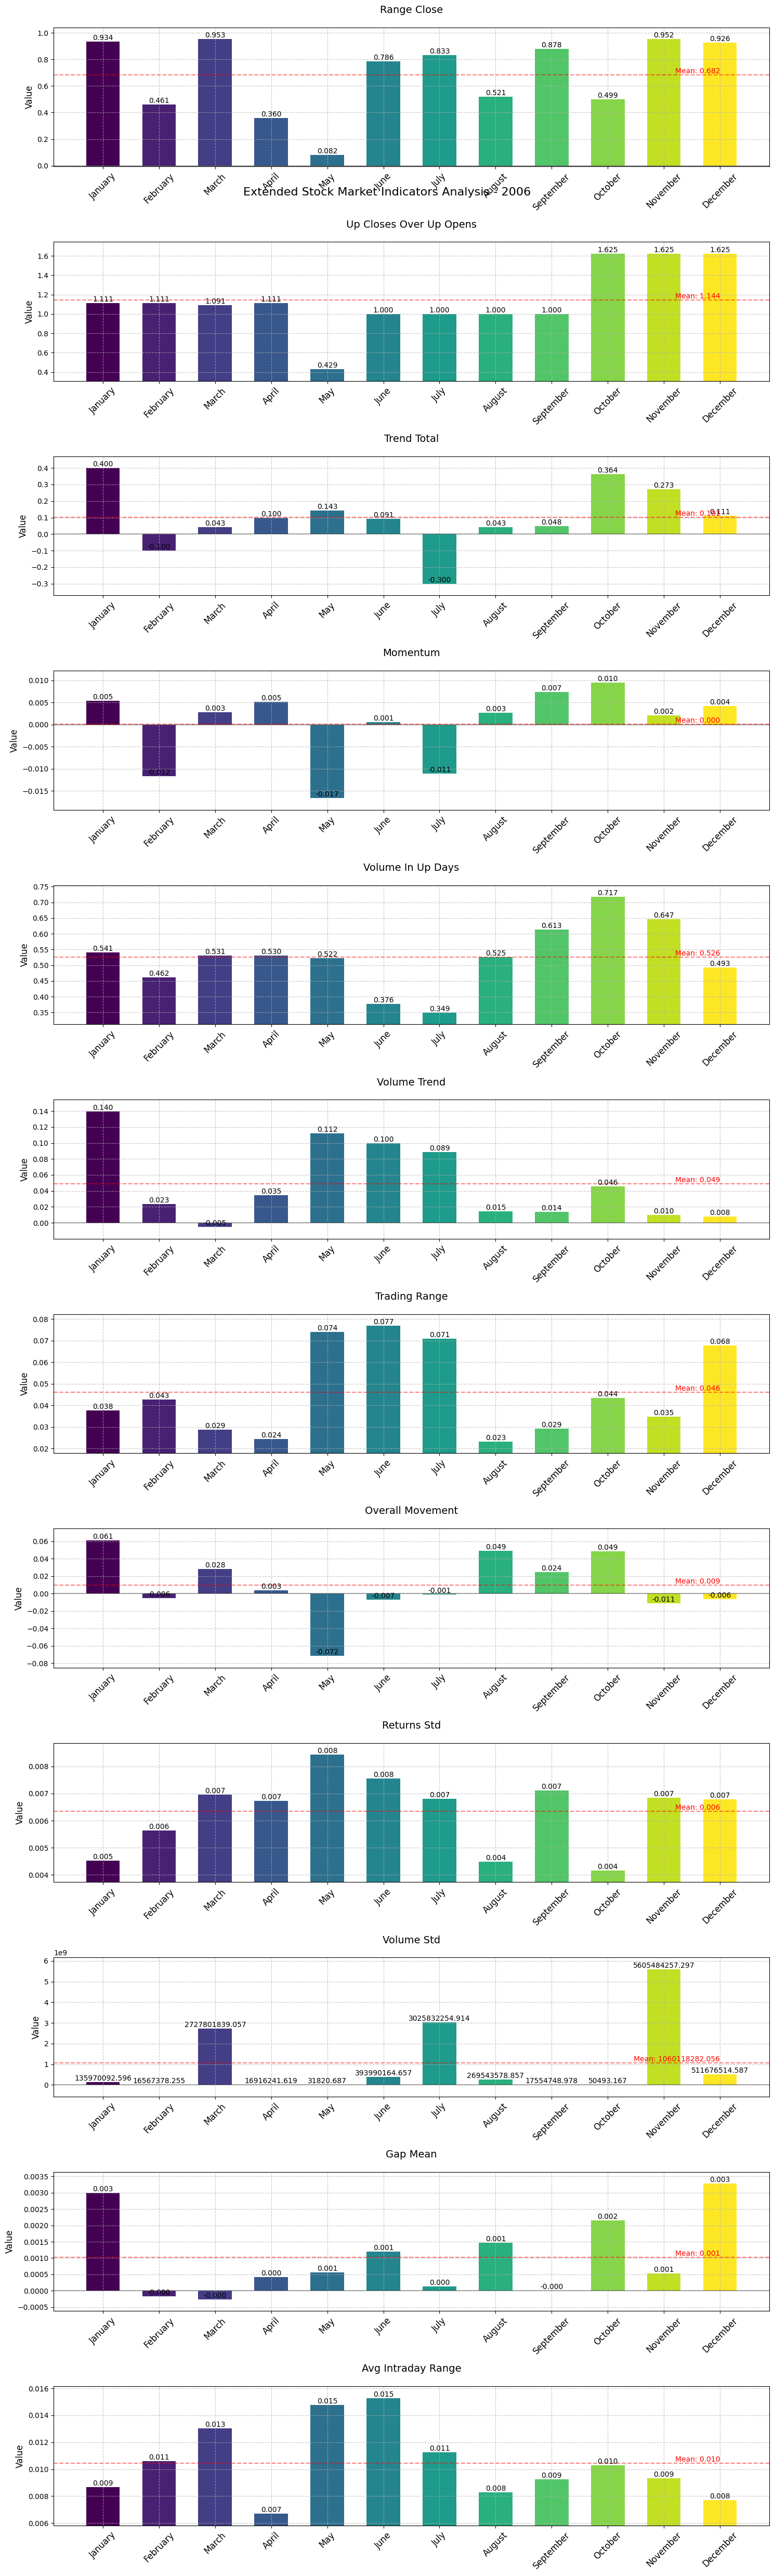

In [13]:
# Select all months from a random year and visualize characteristics
import matplotlib.pyplot as plt
import numpy as np

# Get a random year
years = sorted(list(DataByTime.keys()))
selected_year = np.random.choice(years)

# Get all months for that year in chronological order
months = ['January', 'February', 'March', 'April', 'May', 'June', 
         'July', 'August', 'September', 'October', 'November', 'December']
months = [m for m in months if m in DataByTime[selected_year]]

# Expanded characteristics to plot
characteristics = [
    'range_close', 'up_closes_over_up_opens', 'trend_total',
    'momentum', 'volume_in_up_days', 'volume_trend',
    'trading_range', 'overall_movement', 'returns_std',
    'volume_std', 'gap_mean', 'avg_intraday_range'
]

# Create subplots with more space and better formatting
fig, axes = plt.subplots(len(characteristics), 1, figsize=(15, 50))
fig.suptitle(f'Extended Stock Market Indicators Analysis - {selected_year}', fontsize=16, y=0.92)

# Color scheme - one color per month
colors = plt.cm.viridis(np.linspace(0, 1, len(months)))

# Print monthly returns and key stats
print(f"\nMonthly Analysis for {selected_year}:")
print("-" * 50)

for month in months:
    if DataByTime[selected_year][month]:
        indices = list(DataByTime[selected_year][month].keys())
        selected_index = np.random.choice(indices)
        data = DataByTime[selected_year][month][selected_index]
        
        # Calculate key metrics
        monthly_return = ((data['stats']['last_close'] - data['stats']['first_open']) / data['stats']['first_open']) * 100
        volatility = data['stats']['returns_std'] * 100
        volume_change = data['stats']['volume_trend'] * 100
        
        print(f"\n{month}:")
        print(f"Monthly Return: {monthly_return:.2f}%")
        print(f"Volatility: {volatility:.2f}%")
        print(f"Volume Trend: {volume_change:+.2f}%")

for i, char in enumerate(characteristics):
    values = []
    labels = []
    
    for month in months:
        if DataByTime[selected_year][month]:
            # Get a random stock index from this month
            indices = list(DataByTime[selected_year][month].keys())
            selected_index = np.random.choice(indices)
            value = DataByTime[selected_year][month][selected_index]['stats'][char]
            
            try:
                float_value = float(value)
                if not np.isnan(float_value):
                    values.append(float_value)
                    labels.append(f"{month}")
            except (ValueError, TypeError):
                continue

    if values:
        x_pos = np.arange(len(labels))
        bars = axes[i].bar(x_pos, values, color=colors[:len(values)], width=0.6)
        
        # Add value labels on top of bars
        for bar in bars:
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.3f}',
                        ha='center', va='bottom')
        
        # Enhanced formatting
        axes[i].set_xticks(x_pos)
        axes[i].set_xticklabels(labels, fontsize=12)
        axes[i].set_title(char.replace('_', ' ').title(), fontsize=14, pad=20)
        axes[i].set_ylabel('Value', fontsize=12)
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(True, linestyle='--', alpha=0.7)
        
        # Add horizontal line at y=0 for reference
        axes[i].axhline(y=0, color='black', linestyle='-', alpha=0.3)
        
        # Set y-axis limits with some padding
        max_val = np.max(values)
        min_val = np.min(values)
        padding = (max_val - min_val) * 0.1
        axes[i].set_ylim(min_val - padding, max_val + padding)
        
        # Add mean line
        mean_val = np.mean(values)
        axes[i].axhline(y=mean_val, color='red', linestyle='--', alpha=0.5)
        axes[i].text(len(values)-1, mean_val, f'Mean: {mean_val:.3f}', 
                    color='red', va='bottom', ha='right')

plt.tight_layout()
plt.show()


Now, lets get some proof of concept. We are going to change the data simply into important figures, and then label it with a positive or negative return over the median during the next 2 months.

In [14]:
# Create a list to store our training data and labels
X = []  # Features
y = []  # Labels (1 for above median return, 0 for below median)
returns = []  # Store all returns to calculate median

# First pass: collect all returns to calculate median
for year in sorted(DataByTime.keys()):
    for month in ['January', 'February', 'March', 'April', 'May', 
                  'June', 'July', 'August', 'September', 'October',
                  'November', 'December']:
        
        if not DataByTime[year][month]:
            continue
            
        # Loop through all indices in this month
        for index in DataByTime[year][month].keys():
            
            if isinstance(year, (int, float)) and year == list(DataByTime.keys())[-1] and month in ['November', 'December']:
                continue
                
            future_month_idx = (list(DataByTime[year].keys()).index(month) + 2) % 12
            future_year = year + ((list(DataByTime[year].keys()).index(month) + 2) // 12)
            future_month = list(DataByTime[year].keys())[future_month_idx]
            
            try:
                if 'stats' not in DataByTime[future_year][future_month][index] or 'stats' not in DataByTime[year][month][index]:
                    continue
                    
                future_price = DataByTime[future_year][future_month][index]['stats']['last_close']
                current_price = DataByTime[year][month][index]['stats']['last_close']
                future_return = (future_price - current_price) / current_price
                returns.append(future_return)
            except (KeyError, IndexError):
                continue

# Calculate median return
median_return = np.median(returns)

# Second pass: create features and labels based on median
for year in sorted(DataByTime.keys()):
    for month in ['January', 'February', 'March', 'April', 'May', 
                  'June', 'July', 'August', 'September', 'October',
                  'November', 'December']:
        
        if not DataByTime[year][month]:
            continue
            
        # Loop through all indices in this month
        for index in DataByTime[year][month].keys():
            
            if isinstance(year, (int, float)) and year == list(DataByTime.keys())[-1] and month in ['November', 'December']:
                continue
                
            if 'stats' not in DataByTime[year][month][index]:
                continue
                
            current_stats = DataByTime[year][month][index]['stats']
            
            future_month_idx = (list(DataByTime[year].keys()).index(month) + 2) % 12
            future_year = year + ((list(DataByTime[year].keys()).index(month) + 2) // 12)
            future_month = list(DataByTime[year].keys())[future_month_idx]
            
            try:
                if 'stats' not in DataByTime[future_year][future_month][index]:
                    continue
                    
                future_price = DataByTime[future_year][future_month][index]['stats']['last_close']
                current_price = current_stats['last_close']
                future_return = (future_price - current_price) / current_price
                
                # Check if all required stats exist
                required_stats = [
                    'avg_intraday_range', 'gap_mean', 'gap_std', 'm_avg_volatility',
                    'm_avg_volume', 'm_breadth', 'm_weighted_trend', 'momentum',
                    'overall_movement', 'prev_month_returns', 'quarterly_trend',
                    'range_close', 'returns_mean', 'returns_std', 'returns_sum',
                    'seasonality_score', 'trading_range', 'trend_total',
                    'up_closes_over_up_opens', 'volume_in_up_days', 'volume_mean',
                    'volume_std', 'volume_trend'
                ]
                                
                if not all(stat in current_stats for stat in required_stats):
                    continue
                
                features = [
                    current_stats['avg_intraday_range'],
                    current_stats['gap_mean'],
                    current_stats['gap_std'],
                    current_stats['m_avg_volatility'],
                    current_stats['m_avg_volume'],
                    current_stats['m_breadth'],
                    current_stats['m_weighted_trend'],
                    current_stats['momentum'],
                    current_stats['overall_movement'],
                    current_stats['prev_month_returns'],
                    current_stats['quarterly_trend'],
                    current_stats['range_close'],
                    current_stats['returns_mean'],
                    current_stats['returns_std'],
                    current_stats['returns_sum'],
                    current_stats['seasonality_score'],
                    current_stats['trading_range'],
                    current_stats['trend_total'],
                    current_stats['up_closes_over_up_opens'],
                    current_stats['volume_in_up_days'],
                    current_stats['volume_mean'],
                    current_stats['volume_std'],
                    current_stats['volume_trend']
                ]
                
                # Check for NaN or infinite values
                if not any(np.isnan(features)) and not any(np.isinf(features)):
                    X.append(features)
                    y.append(1 if future_return > median_return else 0)
                
            except (KeyError, IndexError):
                continue

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

print(f"Total samples: {len(X)}")
print(f"Above median returns: {sum(y)}")
print(f"Below median returns: {len(y) - sum(y)}")
print(f"Median return: {median_return:.2%}")


Total samples: 1661
Above median returns: 830
Below median returns: 831
Median return: 2.05%


We hope to predict with an accuracy of around 52%-53% that the return will be over the median, which will constitute a successful model.

In [25]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# First collect all data chronologically with explicit label calculation
all_data = []
timestamps = []
features = []
labels = []

for year in sorted(DataByTime.keys()):
    for month in sorted(DataByTime[year].keys()):
        # Get the maximum year value first to avoid calling max() on numpy float
        max_year = np.max(DataByTime.keys())
        if month not in ['November', 'December'] or year != max_year:  # Skip last 2 months
            month_idx = list(DataByTime[year].keys()).index(month)
            
            # Calculate future month for label
            future_month_idx = (month_idx + 2) % 12
            future_year = year + ((month_idx + 2) // 12)
            future_month = list(DataByTime[year].keys())[future_month_idx]
            
            for index in DataByTime[year][month]:
                if ('stats' in DataByTime[year][month][index] and 
                    future_year in DataByTime and 
                    future_month in DataByTime[future_year] and 
                    index in DataByTime[future_year][future_month]):
                    
                    # Get current and future prices
                    current_price = DataByTime[year][month][index]['stats']['last_close']
                    future_price = DataByTime[future_year][future_month][index]['stats']['last_close']
                    
                    # Calculate return and label
                    future_return = (future_price - current_price) / current_price
                    label = 1 if future_return > np.median(returns) else 0  # returns should be pre-calculated
                    
                    # Get feature vector
                    stats = DataByTime[year][month][index]['stats']
                    if all(stat in stats for stat in required_stats):
                        feature_vector = [stats[stat] if not np.isinf(stats[stat]) else np.nan for stat in required_stats]
                        if not any(np.isnan(feature_vector)):
                            timestamp = pd.Timestamp(year=year, month=month_idx+1, day=1)
                            timestamps.append(timestamp)
                            features.append(feature_vector)
                            labels.append(label)

# Convert to numpy arrays and sort by time
timestamps = np.array(timestamps)
features = np.array(features)
labels = np.array(labels)

# Sort by timestamp
sort_idx = np.argsort(timestamps)
timestamps = timestamps[sort_idx]
features = features[sort_idx]
labels = labels[sort_idx]

# Print distribution check
print("Label distribution before split:", np.bincount(labels))

# Split chronologically
train_idx = int(len(features) * 0.7)
val_idx = int(len(features) * 0.85)

X_train = features[:train_idx]
X_val = features[train_idx:val_idx]
X_test = features[val_idx:]

y_train = labels[:train_idx]
y_val = labels[train_idx:val_idx]
y_test = labels[val_idx:]

# Scale features
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Print diagnostics
print("\nDate ranges:")
print(f"Train: {np.min(timestamps[:train_idx])} to {np.max(timestamps[:train_idx])}")
print(f"Val: {np.min(timestamps[train_idx:val_idx])} to {np.max(timestamps[train_idx:val_idx])}")
print(f"Test: {np.min(timestamps[val_idx:])} to {np.max(timestamps[val_idx:])}")

print("\nLabel distribution after split:")
print("Train:", np.bincount(y_train))
print("Val:", np.bincount(y_val))
print("Test:", np.bincount(y_test))

# Verify feature values
print("\nFeature statistics:")
print("Train mean:", np.mean(X_train_scaled, axis=0)[:5])  # First 5 features
print("Train std:", np.std(X_train_scaled, axis=0)[:5])
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
cv_scores = []
# Import XGBoost
from xgboost import XGBClassifier

# Initialize models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(random_state=42)

for train_idx, val_idx in tscv.split(X_train_scaled):
    X_fold_train, X_fold_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]
    
    # Train and evaluate models
    rf_model.fit(X_fold_train, y_fold_train)
    score = rf_model.score(X_fold_val, y_fold_val)
    cv_scores.append(score)

print(f"Time-based CV scores: {cv_scores}")
print(f"Average CV score: {np.mean(cv_scores):.3f} (+/- {np.std(cv_scores) * 2:.3f})")

# Train final models
rf_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)

# Get predictions
rf_pred = rf_model.predict(X_test_scaled)
xgb_pred = xgb_model.predict(X_test_scaled)

# Print reports
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))

print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_pred))

Label distribution before split: [831 830]

Date ranges:
Train: 2005-01-01 00:00:00 to 2016-08-01 00:00:00
Val: 2016-08-01 00:00:00 to 2018-12-01 00:00:00
Test: 2018-12-01 00:00:00 to 2021-04-01 00:00:00

Label distribution after split:
Train: [593 569]
Val: [133 116]
Test: [105 145]

Feature statistics:
Train mean: [0.34278281 0.08672171 0.23692736 0.         0.        ]
Train std: [1.23971753 1.07747483 1.11886087 0.         0.        ]
Time-based CV scores: [0.36787564766839376, 0.3316062176165803, 0.43523316062176165, 0.533678756476684, 0.5181347150259067]
Average CV score: 0.437 (+/- 0.160)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.65      0.54       105
           1       0.63      0.44      0.52       145

    accuracy                           0.53       250
   macro avg       0.55      0.54      0.53       250
weighted avg       0.56      0.53      0.53       250


XGBoost Classification Report:


In [32]:
#hp optimization

import keras

def new_model(hp):
    model = keras.Sequential()
    activation = hp.Choice(name='activation', values=['tanh', 'relu', 'sigmoid'])

    model.add(keras.Input(shape=(23,)))
    model.add(keras.layers.Dense(units=hp.Int(name='L1', min_value=32, max_value=512, step=32), activation=activation))
    model.add(keras.layers.Dropout(rate=hp.Choice(name='D1', values=[0.5,0.4,0.3,0.2])))
    model.add(keras.layers.Dense(units=hp.Int(name='L2', min_value=16, max_value=256, step=16), activation=activation))
    model.add(keras.layers.Dropout(rate=hp.Choice(name='D2', values=[0.4,0.3,0.2,0.25])))
    model.add(keras.layers.Dense(units=hp.Int(name='L3', min_value=8, max_value=128, step=8),activation=activation))
    model.add(keras.layers.Dense(units=1, activation='sigmoid'))

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

import keras_tuner 
tuner = keras_tuner.Hyperband(hypermodel=new_model, objective='accuracy', max_epochs=100, factor=2, hyperband_iterations=1, project_name='T1', directory="Notebooks/StockDataset/tuner")
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss')
tuner.search(X_train_scaled, y_train, epochs=50, validation_data=(X_val_scaled, y_val), callbacks=[early_stopping])

    

Trial 35 Complete [00h 00m 03s]
accuracy: 0.5172116756439209

Best accuracy So Far: 0.5636833310127258
Total elapsed time: 00h 01m 55s

Search: Running Trial #36

Value             |Best Value So Far |Hyperparameter
sigmoid           |relu              |activation
192               |480               |L1
0.3               |0.5               |D1
32                |144               |L2
0.4               |0.2               |D2
8                 |72                |L3
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
6                 |6                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2


KeyboardInterrupt: 